Epoch 1/1000:
  Output of neuron 1: 0.4421563643845577
  Output of neuron 2: 0.7065624304391233
  Total Error: 0.40520999495234766
  Updated weight w1: -0.11622848714158063
  Updated weight w2: 0.4329172019312603

Epoch 101/1000:
  Output of neuron 1: 0.835648886616246
  Output of neuron 2: 1.1354909235095079e-09
  Total Error: 0.013505644235239776
  Updated weight w1: 3.550511447169297
  Updated weight w2: -1.7499999977143936

Early stopping at epoch 127 with error 0.009914347795382236
Training complete.
Final weight w1: 3.9657402556684658
Final weight w2: -1.7499999999918374
Final total error: 0.009914347795382236


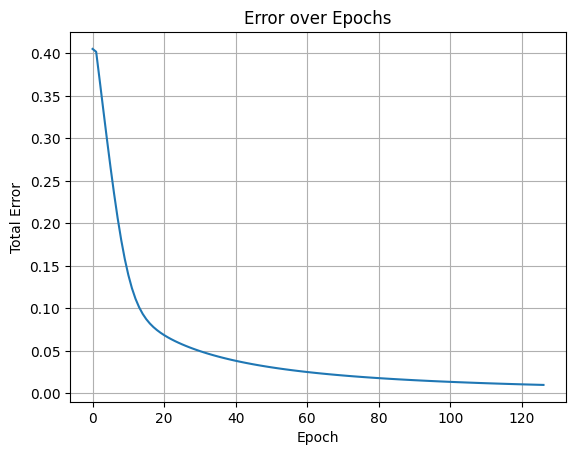

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize weights randomly in the interval [-0.5, 0.5]
np.random.seed(42)  # For reproducibility
w1 = np.random.uniform(-0.5, 0.5)
w2 = np.random.uniform(-0.5, 0.5)
b1 = 0.5
b2 = 0.7

# Tanh activation function
def tanh(x):
    return np.tanh(x)

# Derivative of tanh function (used for backpropagation)
def tanh_derivative(x):
    return 1 - np.tanh(x)**2

# Forward propagation
def forward_pass(x1, x2):
    # Weighted sum of inputs for each neuron
    h1 = w1 * x1 + b1
    h2 = w2 * x2 + b2
    # Apply tanh activation
    output_h1 = tanh(h1)
    output_h2 = tanh(h2)
    return output_h1, output_h2

# Define target output (assuming target is some predefined values)
target = np.array([1, 0])  # Example targets, modify according to your case

# Training function for multiple epochs with enhancements
def train(x1, x2, epochs, learning_rate, momentum=0.9, early_stopping_threshold=0.01):
    global w1, w2  # Make sure we update the global weights
    prev_grad_w1 = 0
    prev_grad_w2 = 0
    error_history = []

    for epoch in range(epochs):
        output_h1, output_h2 = forward_pass(x1, x2)
        
        # Calculate the error (using Mean Squared Error for simplicity)
        E1 = 0.5 * (target[0] - output_h1)**2
        E2 = 0.5 * (target[1] - output_h2)**2
        E_total = E1 + E2
        error_history.append(E_total)
        
        # Calculate the gradients for backpropagation
        grad_w1 = (target[0] - output_h1) * tanh_derivative(output_h1) * x1
        grad_w2 = (target[1] - output_h2) * tanh_derivative(output_h2) * x2
        
        # Update weights with momentum
        w1 += learning_rate * grad_w1 + momentum * prev_grad_w1
        w2 += learning_rate * grad_w2 + momentum * prev_grad_w2

        # Store current gradients for momentum
        prev_grad_w1 = grad_w1
        prev_grad_w2 = grad_w2
        
        # Early stopping condition
        if E_total < early_stopping_threshold:
            print(f"Early stopping at epoch {epoch + 1} with error {E_total}")
            break

        # Print every 100 epochs
        if epoch % 100 == 0:
            print(f"Epoch {epoch + 1}/{epochs}:")
            print(f"  Output of neuron 1: {output_h1}")
            print(f"  Output of neuron 2: {output_h2}")
            print(f"  Total Error: {E_total}")
            print(f"  Updated weight w1: {w1}")
            print(f"  Updated weight w2: {w2}")
            print()

    return w1, w2, E_total, error_history

# Example input
x1, x2 = 0.2, 0.4

# Parameters for training
epochs = 1000  # Number of epochs to train for
learning_rate = 0.1  # Set learning rate

# Train the network for multiple epochs
final_w1, final_w2, final_error, error_history = train(x1, x2, epochs, learning_rate)

# Output final results
print("Training complete.")
print("Final weight w1:", final_w1)
print("Final weight w2:", final_w2)
print("Final total error:", final_error)

# Plot error history
plt.plot(error_history)
plt.title("Error over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Total Error")
plt.grid(True)
plt.show()
